In [ ]:
pip install brian2

In [ ]:
pip install brian2tools

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from random import random
from brian2 import NeuronGroup , run , start_scope , Synapses , SpikeMonitor ,StateMonitor ,PopulationRateMonitor 
from brian2tools import brian_plot , plot_raster
from brian2.units import *

In [ ]:
N_exc = 800
N_inh = 200
R = 0.007*Mohm
tau = 250*ms
V_init = -70*volt
V_r = -75*volt
V_th = -50*volt
i_init = (random()*30)*mA
p_exc = 0.1
p_inh = 0.05
w_exc = 7*volt
w_inh = -8*volt

In [ ]:
start_scope()
G = NeuronGroup(N_exc + N_inh , '''dv/dt = ((V_r - v)+(R*I))/tau : volt
                                  I : amp''',
                threshold = 'v > V_th',
                reset='v = V_r'
                )
G.v = V_init
G.I = i_init
         
exc_neurons = G[:N_exc]
inh_neurons = G[N_exc:]
 

exc_synapse = Synapses(exc_neurons , G , 'w:volt' , on_pre = 'v_post += w')  
inh_synapse = Synapses(inh_neurons , G , 'w:volt' , on_pre = 'v_post += w')

exc_synapse.connect(p = p_exc)
exc_synapse.w = w_exc
inh_synapse.connect(p = p_inh)
inh_synapse.w = w_inh 

 
spike_mon_exc = SpikeMonitor(exc_neurons)
spike_mon_inh = SpikeMonitor(inh_neurons)
spike_mon_G = SpikeMonitor(G)

state_mon_exc_V = StateMonitor(exc_neurons , 'v' , record=True)
state_mon_G_I = StateMonitor(G , 'I' , record=True)

run(1000*ms, report='text')

INFO       No numerical integration method specified for group 'neurongroup', using method 'exact' (took 0.14s). [brian2.stateupdaters.base.method_choice]


Starting simulation at t=0. s for a duration of 1. s
1. s (100%) simulated in 1s


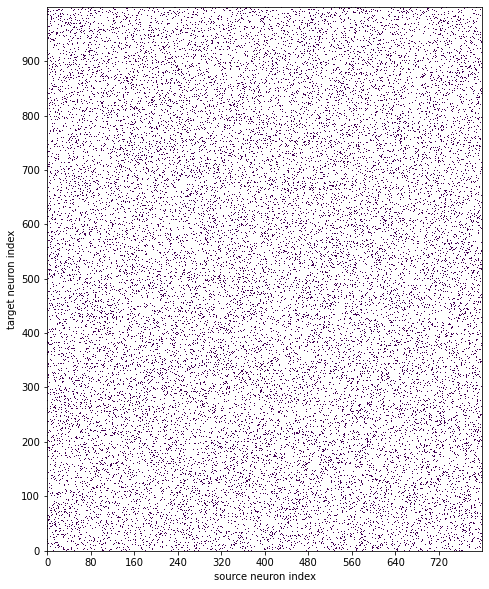

In [ ]:
plt.figure(figsize=(8,10))
brian_plot(exc_synapse)

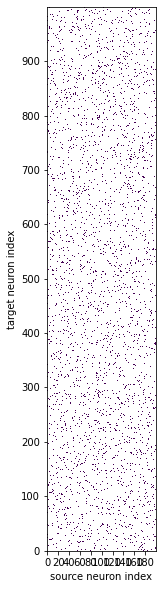

In [ ]:
plt.figure(figsize=(8,10))
brian_plot(inh_synapse)

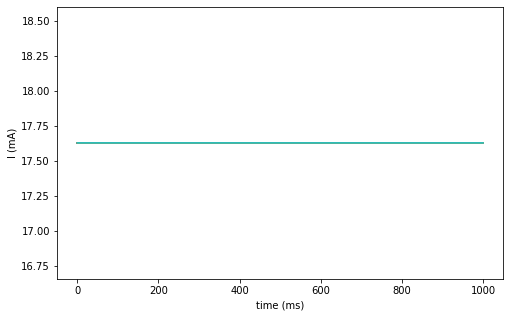

In [ ]:
plt.figure(figsize=(8,5))
brian_plot(state_mon_G_I)

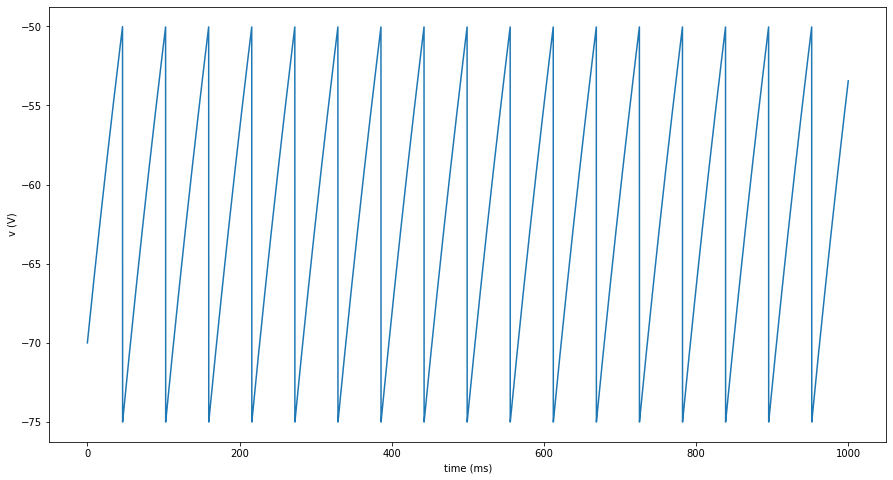

In [ ]:
plt.figure(figsize=(15,8))
brian_plot(state_mon_exc_V[50])

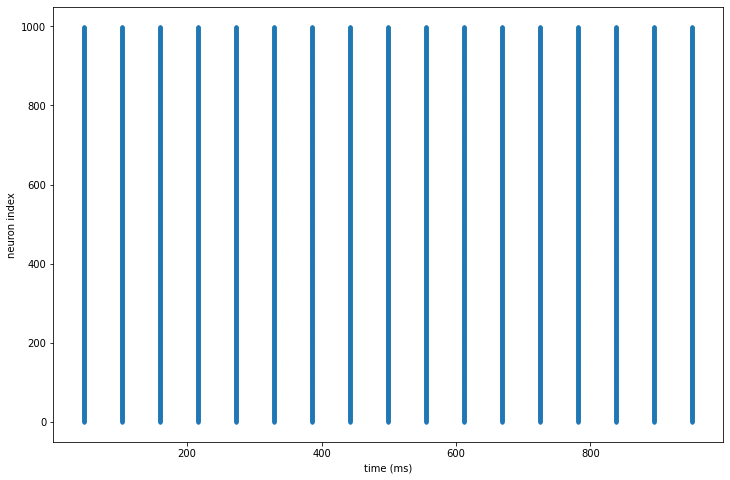

In [ ]:
plt.figure(figsize=(12,8))
brian_plot(spike_mon_G)

In [ ]:
print(f"total spike = {spike_mon_G.num_spikes} ")
print(f"exc spike = {spike_mon_exc.num_spikes} ")
print(f"inh spike = {spike_mon_inh.num_spikes} ")

total spike = 17000 
exc spike = 13600 
inh spike = 3400 


Jaryane motefavet baraye har neuron

In [ ]:
N_exc = 800
N_inh = 200
R = 1.2
tau = 200
V_init = 0
V_reset = -10
V_th = 50
p_exc = 0.1
p_inh = 0.05
w_exc = 0.5
w_inh = -3

In [ ]:
start_scope()
G = NeuronGroup(N_exc + N_inh , '''dv/dt = ( ((V_reset - v)+(R*I))/tau ) /(ms) : 1
                                  I : 1''',
                threshold = 'v > V_th',
                reset='v = V_reset'
                )
G.v = V_init
G.I = '(rand()*30)+100'
         
exc_neurons = G[:N_exc]
inh_neurons = G[N_exc:]
 

exc_synapse = Synapses(exc_neurons , G , 'w:1' , on_pre = 'v_post += w')  
inh_synapse = Synapses(inh_neurons , G , 'w:1' , on_pre = 'v_post += w')

exc_synapse.connect(p = p_exc)
exc_synapse.w = w_exc
inh_synapse.connect(p = p_inh)
inh_synapse.w = w_inh 

 
spike_mon_exc = SpikeMonitor(exc_neurons)
spike_mon_inh = SpikeMonitor(inh_neurons)
spike_mon_G = SpikeMonitor(G)

state_mon_exc_V = StateMonitor(exc_neurons , 'v' , record=True)
state_mon_inh_V = StateMonitor(inh_neurons , 'v' , record=True)
state_mon_G_I = StateMonitor(G , 'I' , record=True)

run(1000*ms, report='text')

INFO       No numerical integration method specified for group 'neurongroup_1', using method 'exact' (took 0.07s). [brian2.stateupdaters.base.method_choice]


Starting simulation at t=0. s for a duration of 1. s
1. s (100%) simulated in 1s


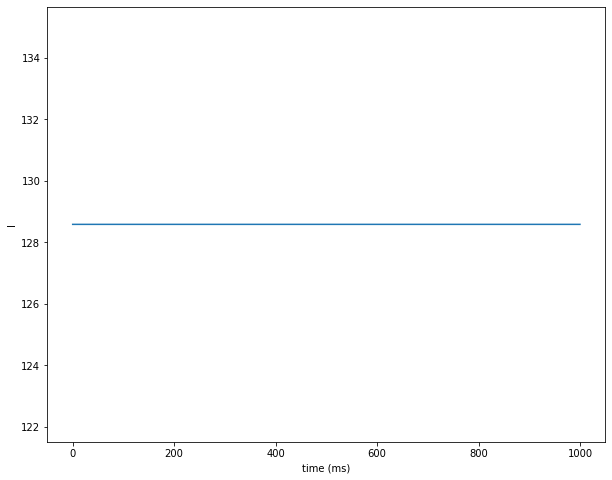

In [ ]:
plt.figure(figsize=(10,8))
brian_plot(state_mon_G_I[100])

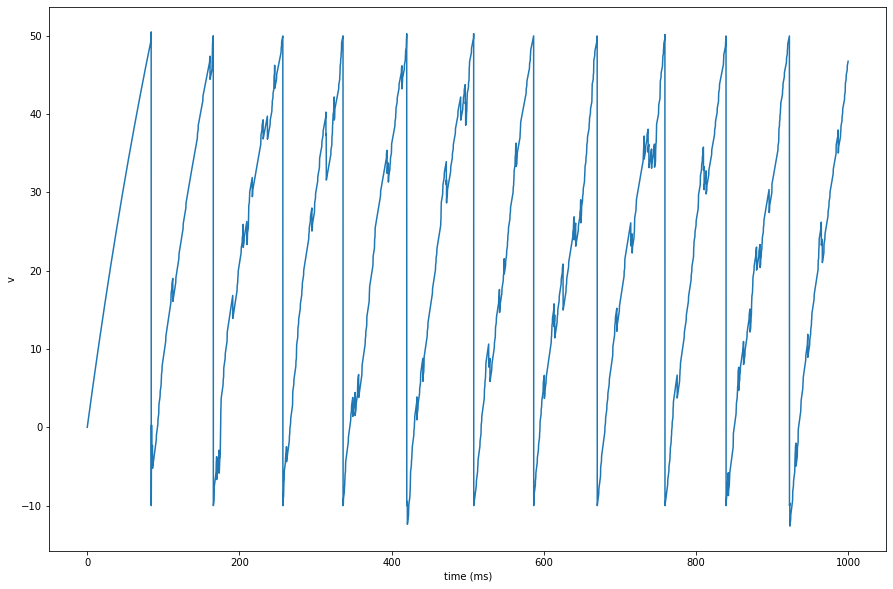

In [ ]:
plt.figure(figsize=(15,10))
brian_plot(state_mon_exc_V[100])

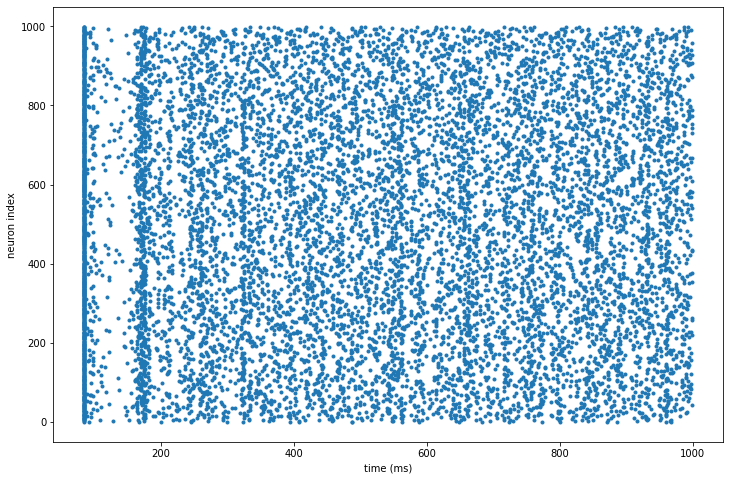

In [ ]:
plt.figure(figsize=(12,8))
brian_plot(spike_mon_G)

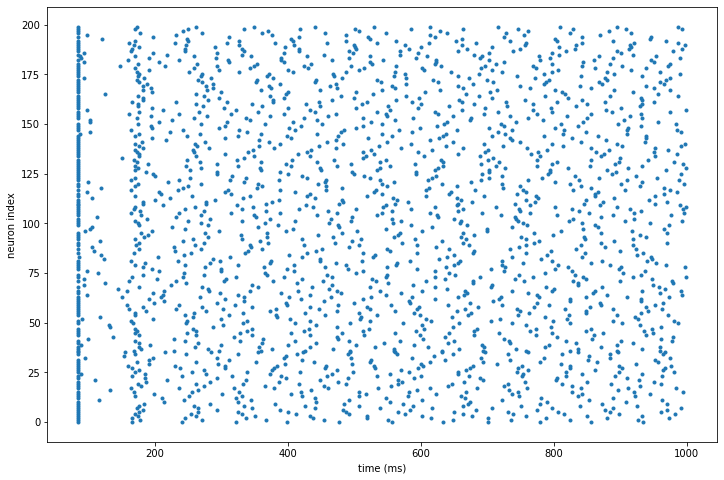

In [ ]:
plt.figure(figsize=(12,8))
brian_plot(spike_mon_inh)